# Genrify Project
## Music genre prediction

Henri Toussaint<br>
Victor Saint Guilhem<br>
Benoît Lafon<br>

The project sets out to predict the genre of a music using the Spotify API, which provides audio features for each tracks. To collect the tracks, we used a recommandation function with a genre seed. We handpicked 20 genres in order to best represent tracks, and from each genre, we collected 100 tracks.

# Data Loading Using Pandas

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("music_collection.csv")
pd_attributes = data.loc[:,'acousticness':'valence']
attributes = np.array(pd_attributes)

print('Number of instances: ' + str(data.shape[0]))
print('Number of attributes: ' + str(pd_attributes.shape[1]))
print('Attributes:')
for i in pd_attributes.columns.values:
    print('\t'+str(i))

Number of instances: 2000
Number of attributes: 12
Attributes:
	acousticness
	danceability
	duration_ms
	energy
	instrumentalness
	key
	liveness
	loudness
	speechiness
	tempo
	time_signature
	valence


In [163]:
data.head()

,artist,track,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,genre
0,Coldplay,Viva La Vida,0.09410,0.485,242373,0.619,0.000003,5,0.1090,-7.115,0.0289,138.017,4.0,0.424,alternative
1,Trails and Ways,Animal (Miike Snow Cover),0.25300,0.686,197624,0.606,0.000000,11,0.1590,-7.897,0.0539,112.107,4.0,0.418,alternative
2,Mumford & Sons,Little Lion Man,0.02750,0.517,245173,0.492,0.000032,5,0.0873,-8.051,0.0272,138.579,4.0,0.446,alternative
3,Linkin Park,Numb,0.00366,0.493,186240,0.856,0.000000,6,0.6280,-4.134,0.0384,110.097,4.0,0.218,alternative
4,The Naked And Famous,Punching In A Dream,0.00276,0.476,238133,0.894,0.000847,6,0.1580,-3.636,0.0469,115.053,4.0,0.164,alternative


# Target variable

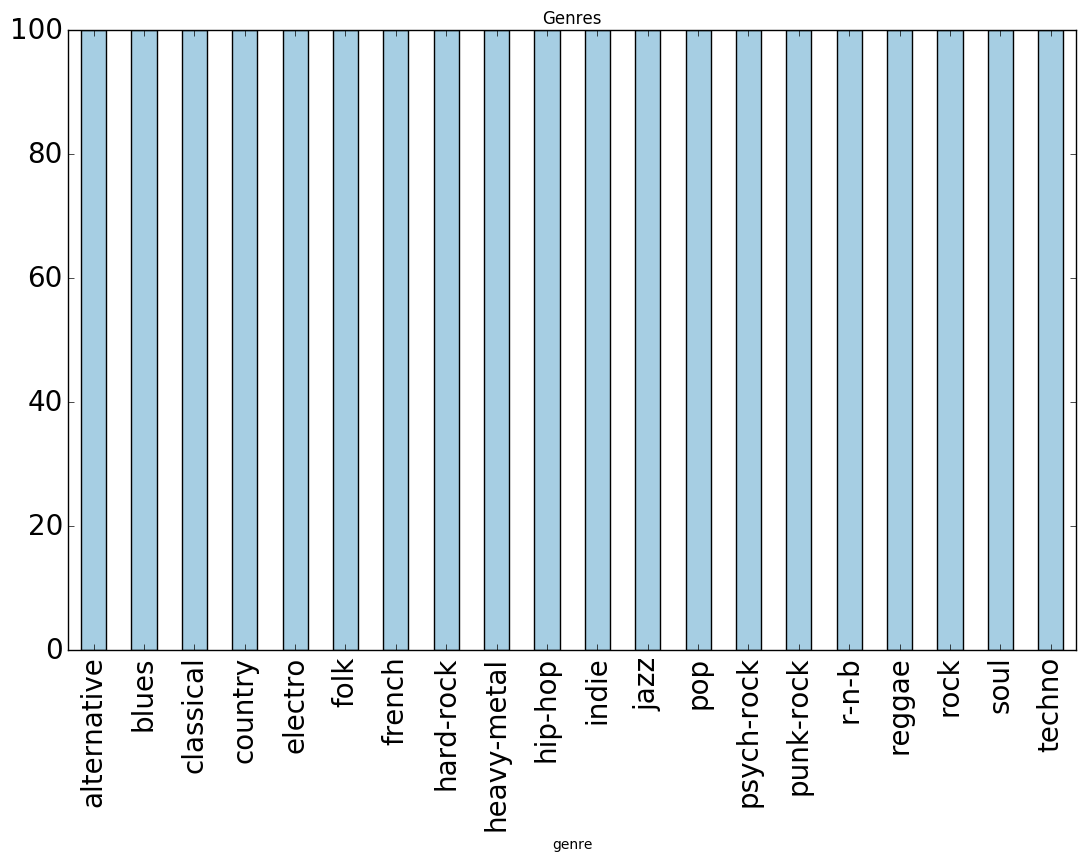

In [164]:
#plt.figure('Genres')
%matplotlib inline
#data['genre'].astype("category")
count_genre = data.groupby("genre").size()
count_genre.plot(kind='bar',title='Genres',figsize=[13,8], colormap='Paired',fontsize=20)


# Target Variable vectorized

In [165]:
pd_target_vect = pd.get_dummies(data['genre'])
pd_target_vect.head()

,alternative,blues,classical,country,electro,folk,french,hard-rock,heavy-metal,hip-hop,indie,jazz,pop,psych-rock,punk-rock,r-n-b,reggae,rock,soul,techno
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [166]:
target_vect = np.array(pd_target_vect)
print('Dimension: ' + str(target_vect.shape))
print(repr(target_vect))

Dimension: (2000, 20)
array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])


# Acousticness attribute

A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic, i.e. not electronically amplified.

<IPython.core.display.Javascript object>


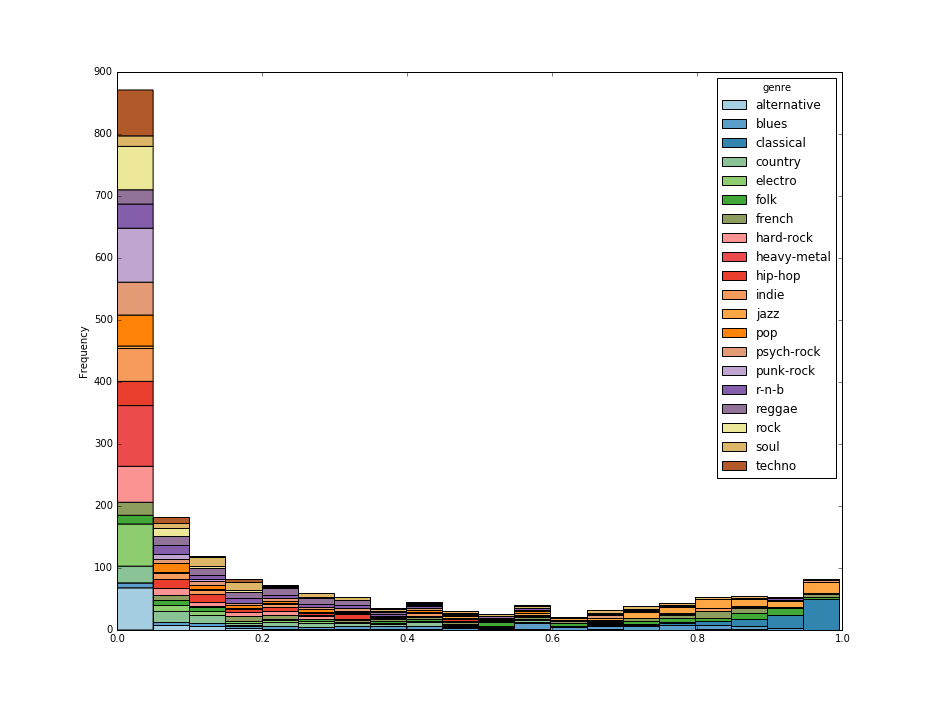

In [167]:
%matplotlib notebook
acousticness = data[['acousticness']]
acousticness_genre = data.loc[:,['acousticness','genre']]

acousticness_by_genre = acousticness_genre.pivot(columns='genre', values='acousticness')
acousticness_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [168]:
acousticness.describe()

,acousticness
count,2000.000000
mean,0.252320
std,0.319621
min,0.000001
25%,0.007850
50%,0.082300
75%,0.419500
max,0.996000


In [169]:
tmp_acous_stats = data.groupby('genre')['acousticness'].describe().reset_index()
acous_stats = tmp_acous_stats.pivot(index='genre',columns='level_1',values=None)
acous_stats.columns.name = ''
acous_stats

acousticness                                              \
level_1              25%       50%       75%  count    max      mean   
genre                                                                  
alternative     0.001710  0.018400  0.094575  100.0  0.888  0.095414   
blues           0.243500  0.524500  0.735500  100.0  0.927  0.478740   
classical       0.889500  0.949000  0.985250  100.0  0.995  0.905330   
country         0.034600  0.114500  0.321750  100.0  0.822  0.204473   
electro         0.006297  0.023350  0.093225  100.0  0.716  0.080890   
folk            0.128250  0.523000  0.823500  100.0  0.974  0.502349   
french          0.063475  0.395000  0.795000  100.0  0.991  0.430727   
hard-rock       0.002927  0.025650  0.145250  100.0  0.609  0.094690   
heavy-metal     0.000028  0.000130  0.001208  100.0  0.276  0.005271   
hip-hop         0.019900  0.091750  0.207750  100.0  0.859  0.150169   
indie           0.006188  0.034900  0.254500  100.0  0.979  0.187212   
jazz            0.691500  0.810500  0.920250  100.0  0.996  0.732165   
pop             0.011375  0.049100  0.173000  100.0  0.932  0.148090   
psych-rock      0.004567  0.040150  0.259000  100.0  0.961  0.181418   
punk-rock       0.000554  0.001500  0.015900  100.0  0.741  0.024410   
r-n-b           0.027100  0.081600  0.272000  100.0  0.945  0.185372   
reggae          0.059600  0.151500  0.265000  100.0  0.693  0.184902   
rock            0.001650  0.011200  0.062825  100.0  0.614  0.063496   
soul            0.113750  0.199500  0.565500  100.0  0.964  0.339496   
techno          0.000679  0.005555  0.052400  100.0  0.570  0.051792   

                                 
level_1           min       std  
genre                            
alternative  0.000016  0.178887  
blues        0.000998  0.280567  
classical    0.155000  0.137477  
country      0.000600  0.209329  
electro      0.000047  0.141440  
folk         0.000005  0.343397  
french       0.000360  0.341770  
hard-rock    0.000033  0.134875  
heavy-metal  0.000001  0.028294  
hip-hop      0.000813  0.179127  
indie        0.000002  0.272960  
jazz         0.000299  0.261734  
pop          0.000095  0.218823  
psych-rock   0.000002  0.259573  
punk-rock    0.000003  0.079297  
r-n-b        0.000950  0.226194  
reggae       0.000482  0.151436  
rock         0.000021  0.117604  
soul         0.003420  0.298423  
techno       0.000003  0.105786

# Danceability attribute

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

<IPython.core.display.Javascript object>


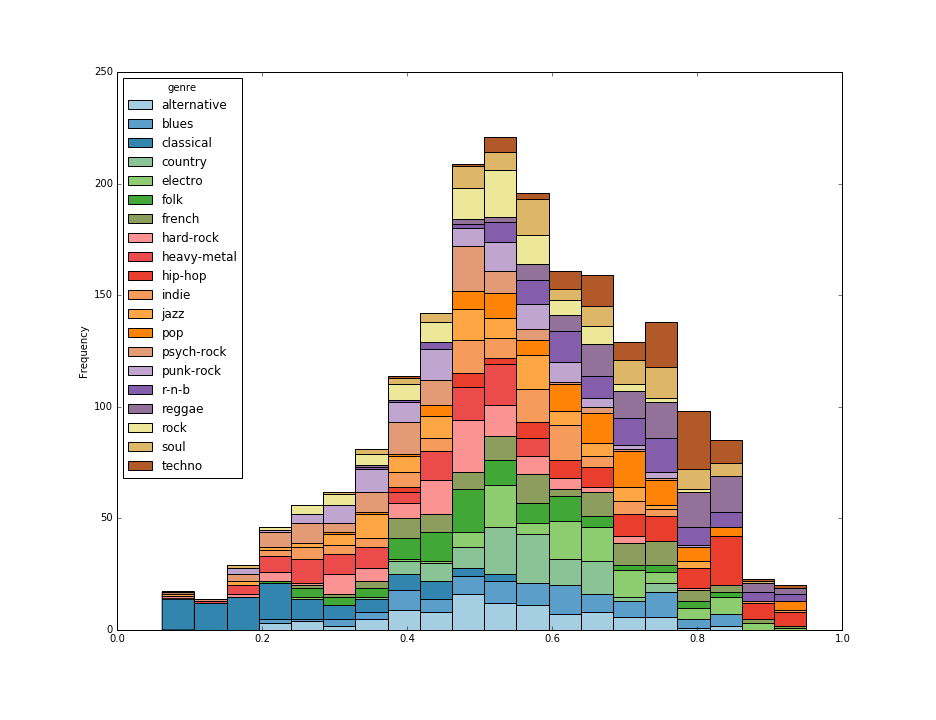

In [170]:
danceability = data[['danceability']]
danceability_genre = data.loc[:,['danceability','genre']]

danceability_by_genre = danceability_genre.pivot(columns='genre', values='danceability')
danceability_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [171]:
danceability.describe()

,danceability
count,2000.000000
mean,0.552618
std,0.176299
min,0.062300
25%,0.443000
50%,0.553000
75%,0.682000
max,0.950000


In [172]:
tmp_dance_stats = data.groupby('genre')['danceability'].describe().reset_index()
dance_stats = tmp_dance_stats.pivot(index='genre',columns='level_1',values=None)
dance_stats.columns.name = ''
dance_stats

danceability                                                   \
level_1              25%     50%      75%  count    max      mean     min   
genre                                                                       
alternative      0.42475  0.5210  0.62575  100.0  0.857  0.523040  0.2010   
blues            0.46875  0.5915  0.68850  100.0  0.858  0.576660  0.2030   
classical        0.14925  0.2260  0.34150  100.0  0.533  0.246793  0.0623   
country          0.50975  0.5600  0.61425  100.0  0.768  0.561970  0.3580   
electro          0.54425  0.6365  0.71675  100.0  0.912  0.643540  0.2400   
folk             0.43600  0.4995  0.59550  100.0  0.823  0.511630  0.2350   
french           0.49000  0.5715  0.71350  100.0  0.949  0.592550  0.2580   
hard-rock        0.39575  0.4770  0.53375  100.0  0.806  0.463220  0.1050   
heavy-metal      0.30650  0.4350  0.50725  100.0  0.594  0.402250  0.1430   
hip-hop          0.63750  0.7495  0.83050  100.0  0.950  0.728670  0.3840   
indie            0.42875  0.5400  0.61200  100.0  0.922  0.521610  0.2070   
jazz             0.38950  0.5030  0.58600  100.0  0.805  0.496066  0.0776   
pop              0.54400  0.6600  0.72850  100.0  0.937  0.642030  0.3020   
psych-rock       0.32650  0.4355  0.48950  100.0  0.766  0.412640  0.1050   
punk-rock        0.36775  0.4640  0.57025  100.0  0.774  0.468520  0.1530   
r-n-b            0.59375  0.6805  0.76325  100.0  0.937  0.677280  0.3530   
reggae           0.66975  0.7495  0.80275  100.0  0.941  0.729420  0.3310   
rock             0.43600  0.5175  0.57950  100.0  0.806  0.506190  0.2170   
soul             0.53175  0.6300  0.74725  100.0  0.864  0.626860  0.1670   
techno           0.65450  0.7550  0.79700  100.0  0.913  0.721420  0.4020   

                       
level_1           std  
genre                  
alternative  0.143958  
blues        0.151946  
classical    0.128492  
country      0.087739  
electro      0.122341  
folk         0.133669  
french       0.146019  
hard-rock    0.121761  
heavy-metal  0.121822  
hip-hop      0.132402  
indie        0.143514  
jazz         0.144434  
pop          0.129960  
psych-rock   0.129870  
punk-rock    0.137184  
r-n-b        0.123536  
reggae       0.108438  
rock         0.121752  
soul         0.140811  
techno       0.097963

# Duration attribute

The duration of the track in milliseconds.

<IPython.core.display.Javascript object>


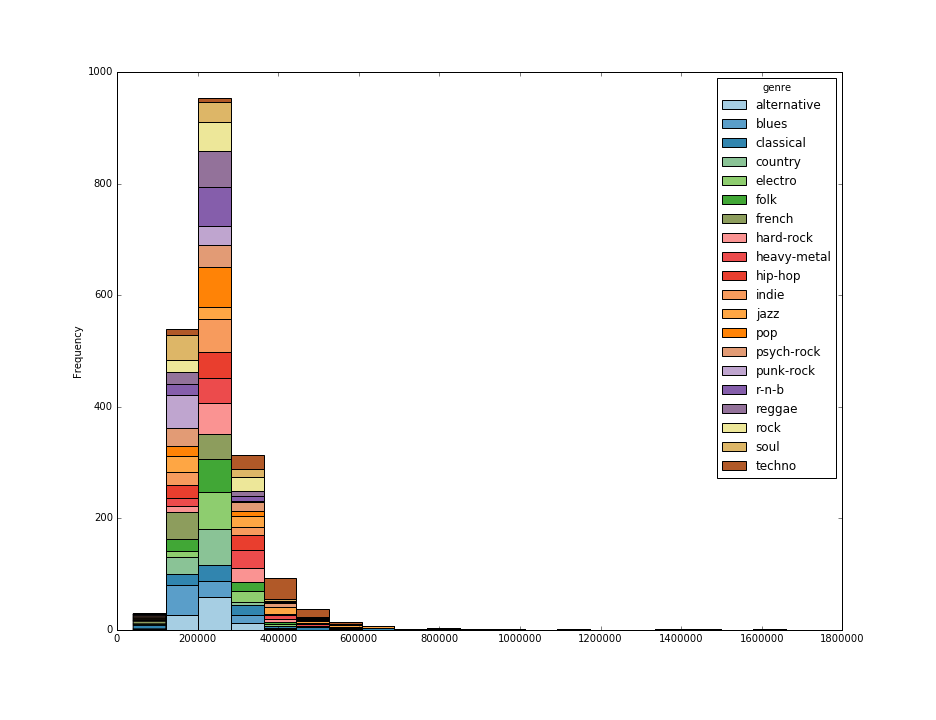

In [173]:
duration_ms = data[['duration_ms']]
duration_ms_genre = data.loc[:,['duration_ms','genre']]

duration_ms_by_genre = duration_ms_genre.pivot(columns='genre', values='duration_ms')
duration_ms_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [174]:
duration_ms.describe()

,duration_ms
count,2.000000e+03
mean,2.510632e+05
std,1.015924e+05
min,4.013300e+04
25%,1.973102e+05
50%,2.321790e+05
75%,2.787202e+05
max,1.660000e+06


In [175]:
tmp_dura_stats = data.groupby('genre')['duration_ms'].describe().reset_index()
dura_stats = tmp_dura_stats.pivot(index='genre',columns='level_1',values=None)
dura_stats.columns.name = ''
dura_stats

duration_ms                                                    \
level_1             25%       50%        75%  count        max       mean   
genre                                                                       
alternative   198417.00  230813.5  262300.00  100.0   377973.0  235720.79   
blues         163033.00  193860.0  254743.25  100.0   535333.0  214956.05   
classical     194837.00  248653.5  352603.00  100.0  1660000.0  340468.21   
country       199463.25  220380.0  235177.00  100.0   323467.0  221435.78   
electro       213906.50  237146.0  271589.75  100.0   410097.0  249060.47   
folk          203876.75  238253.5  265276.75  100.0   414587.0  241546.30   
french        159602.25  197493.5  231760.75  100.0   274960.0  194941.11   
hard-rock     228857.00  264526.5  298469.75  100.0   536960.0  270685.78   
heavy-metal   227923.50  262646.5  308649.75  100.0   506160.0  272376.05   
hip-hop       205192.50  242853.5  284463.50  100.0   461840.0  244414.17   
indie         201706.75  225620.0  263486.50  100.0   467587.0  233005.35   
jazz          197326.75  278854.5  384916.50  100.0   941360.0  316391.28   
pop           204253.75  227500.0  256805.00  100.0   484147.0  233693.05   
psych-rock    177980.25  230144.5  282777.75  100.0   529427.0  242527.58   
punk-rock     169083.25  195320.0  221366.75  100.0   493400.0  200106.53   
r-n-b         212489.75  239026.5  260483.25  100.0   484147.0  235536.20   
reggae        207444.75  229433.5  255060.00  100.0   500742.0  239126.72   
rock          210070.00  237287.0  286716.50  100.0   536960.0  250122.88   
soul          170767.75  210746.5  258630.00  100.0   451400.0  222210.13   
techno        307801.00  373713.0  426251.50  100.0   597560.0  362940.08   

                                      
level_1           min            std  
genre                                 
alternative  110093.0   47521.217525  
blues        119133.0   70161.161186  
classical     76133.0  278580.649587  
country      148107.0   33576.004544  
electro      148387.0   50978.610896  
folk         109736.0   54190.116498  
french        73160.0   44853.190607  
hard-rock     40133.0   74468.150925  
heavy-metal  152987.0   68000.432579  
hip-hop       87813.0   57022.036120  
indie        105440.0   55199.529777  
jazz          77533.0  162150.499590  
pop          155337.0   42243.213246  
psych-rock    57173.0   83884.052969  
punk-rock     94893.0   51938.798554  
r-n-b        119133.0   47132.781523  
reggae       108315.0   60008.181180  
rock         121880.0   59680.427521  
soul         122640.0   65830.095300  
techno       123867.0  103648.545444

# Energy attribute

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

<IPython.core.display.Javascript object>


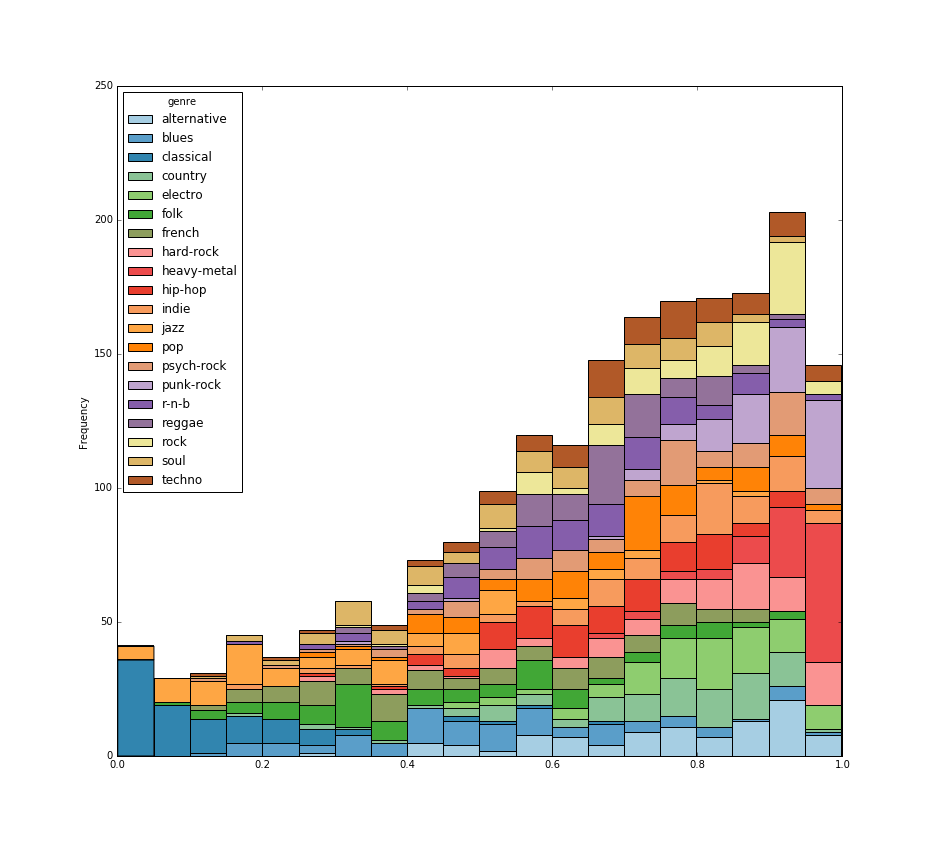

In [176]:
energy = data[['energy']]
energy_genre = data.loc[:,['energy','genre']]

energy_by_genre = energy_genre.pivot(columns='genre', values='energy')
energy_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,12],bins=20)

In [177]:
energy.describe()

,energy
count,2000.000000
mean,0.653649
std,0.249312
min,0.001060
25%,0.505000
50%,0.707500
75%,0.856250
max,0.998000


In [178]:
tmp_ener_stats = data.groupby('genre')['energy'].describe().reset_index()
ener_stats = tmp_ener_stats.pivot(index='genre',columns='level_1',values=None)
ener_stats.columns.name = ''
ener_stats

energy                                                     \
level_1           25%      50%      75%  count    max      mean      min   
genre                                                                      
alternative  0.637250  0.79350  0.90800  100.0  0.983  0.763330  0.27600   
blues        0.378250  0.50200  0.66525  100.0  0.975  0.519220  0.13800   
classical    0.030875  0.08665  0.18400  100.0  0.656  0.125799  0.00106   
country      0.666000  0.78250  0.86100  100.0  0.956  0.740840  0.16300   
electro      0.738250  0.81950  0.88175  100.0  0.993  0.801330  0.46100   
folk         0.311000  0.45250  0.63475  100.0  0.935  0.481431  0.06310   
french       0.323250  0.50700  0.69625  100.0  0.894  0.509740  0.12400   
hard-rock    0.681250  0.82350  0.91225  100.0  0.992  0.781890  0.25100   
heavy-metal  0.908000  0.95200  0.98050  100.0  0.998  0.928660  0.65400   
hip-hop      0.569500  0.68000  0.78950  100.0  0.944  0.677370  0.29200   
indie        0.649000  0.77750  0.87025  100.0  0.983  0.729510  0.17200   
jazz         0.158000  0.30500  0.48925  100.0  0.891  0.330594  0.00211   
pop          0.589500  0.71100  0.79350  100.0  0.963  0.684180  0.26400   
psych-rock   0.580500  0.76550  0.88450  100.0  0.990  0.717620  0.10400   
punk-rock    0.850000  0.91800  0.96025  100.0  0.992  0.890000  0.32200   
r-n-b        0.547750  0.65250  0.77575  100.0  0.977  0.649990  0.18300   
reggae       0.583500  0.67950  0.74325  100.0  0.925  0.662440  0.33700   
rock         0.706500  0.84250  0.90700  100.0  0.979  0.794330  0.34500   
soul         0.407750  0.59050  0.72575  100.0  0.926  0.572850  0.10100   
techno       0.611500  0.73450  0.84325  100.0  0.996  0.711860  0.13800   

                       
level_1           std  
genre                  
alternative  0.168592  
blues        0.201854  
classical    0.131742  
country      0.165528  
electro      0.121059  
folk         0.217034  
french       0.216122  
hard-rock    0.174267  
heavy-metal  0.074386  
hip-hop      0.141227  
indie        0.187378  
jazz         0.214098  
pop          0.164102  
psych-rock   0.191291  
punk-rock    0.102284  
r-n-b        0.164448  
reggae       0.123151  
rock         0.150230  
soul         0.196055  
techno       0.172714

# Instrumentalness attribute

Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

<IPython.core.display.Javascript object>


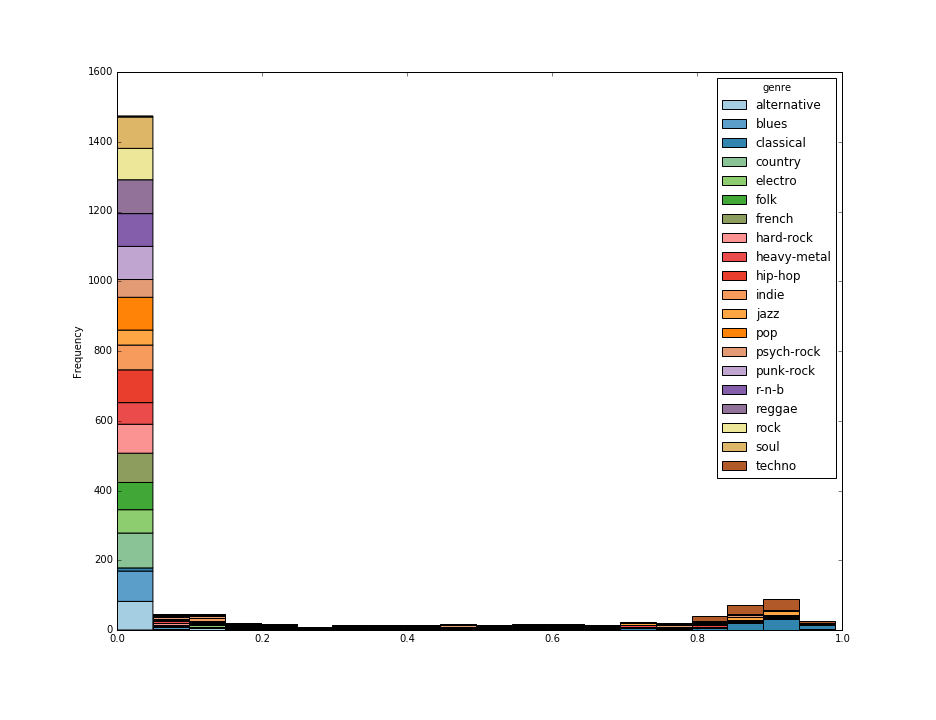

In [179]:
instrumentalness = data[['instrumentalness']]
instrumentalness_genre = data.loc[:,['instrumentalness','genre']]

instrumentalness_by_genre = instrumentalness_genre.pivot(columns='genre', values='instrumentalness')
instrumentalness_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [180]:
instrumentalness.describe()

,instrumentalness
count,2000.000000
mean,0.157688
std,0.306545
min,0.000000
25%,0.000000
50%,0.000174
75%,0.077700
max,0.990000


In [181]:
tmp_inst_stats = data.groupby('genre')['instrumentalness'].describe().reset_index()
inst_stats = tmp_inst_stats.pivot(index='genre',columns='level_1',values=None)
inst_stats.columns.name = ''
inst_stats

instrumentalness                                               \
level_1                  25%       50%       75%  count     max      mean   
genre                                                                       
alternative         0.000005  0.000205  0.006202  100.0  0.9770  0.063306   
blues               0.000000  0.000087  0.006077  100.0  0.9430  0.040115   
classical           0.654750  0.881500  0.917750  100.0  0.9900  0.722082   
country             0.000000  0.000000  0.000019  100.0  0.0481  0.000764   
electro             0.000002  0.001900  0.235250  100.0  0.9260  0.186537   
folk                0.000003  0.000687  0.038275  100.0  0.9190  0.100618   
french              0.000000  0.000017  0.003118  100.0  0.9270  0.058374   
hard-rock           0.000005  0.000424  0.012925  100.0  0.9020  0.051266   
heavy-metal         0.000249  0.011150  0.249000  100.0  0.9210  0.171552   
hip-hop             0.000000  0.000000  0.000002  100.0  0.8150  0.030426   
indie               0.000053  0.000985  0.108500  100.0  0.9530  0.139958   
jazz                0.001188  0.184000  0.820500  100.0  0.9820  0.379490   
pop                 0.000000  0.000001  0.000062  100.0  0.6160  0.017698   
psych-rock          0.000317  0.045800  0.613000  100.0  0.9500  0.276044   
punk-rock           0.000000  0.000004  0.000093  100.0  0.8600  0.018917   
r-n-b               0.000000  0.000003  0.000208  100.0  0.2260  0.008265   
reggae              0.000000  0.000000  0.000009  100.0  0.1580  0.005055   
rock                0.000000  0.000108  0.001863  100.0  0.7890  0.037841   
soul                0.000000  0.000015  0.001056  100.0  0.9060  0.048535   
techno              0.809750  0.881000  0.915250  100.0  0.9700  0.796907   

                                 
level_1           min       std  
genre                            
alternative  0.000000  0.182635  
blues        0.000000  0.133370  
classical    0.000004  0.304292  
country      0.000000  0.004882  
electro      0.000000  0.310374  
folk         0.000000  0.231687  
french       0.000000  0.176176  
hard-rock    0.000000  0.142450  
heavy-metal  0.000000  0.274358  
hip-hop      0.000000  0.135555  
indie        0.000000  0.273054  
jazz         0.000000  0.391256  
pop          0.000000  0.079914  
psych-rock   0.000000  0.343768  
punk-rock    0.000000  0.098182  
r-n-b        0.000000  0.032986  
reggae       0.000000  0.024363  
rock         0.000000  0.137430  
soul         0.000000  0.154935  
techno       0.000030  0.227639

# Key attribute

The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

<IPython.core.display.Javascript object>


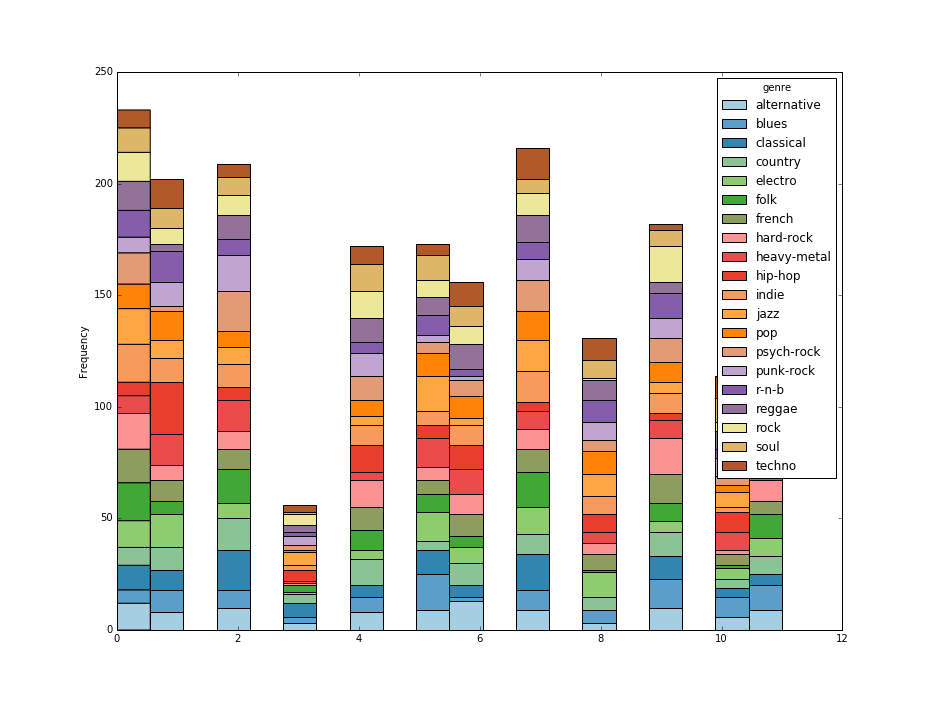

In [182]:
key = data[['key']]
key_genre = data.loc[:,['key','genre']]

key_by_genre = key_genre.pivot(columns='genre', values='key')
key_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [183]:
key.describe()

,key
count,2000.000000
mean,5.165500
std,3.526234
min,0.000000
25%,2.000000
50%,5.000000
75%,8.000000
max,11.000000


In [184]:
tmp_key_stats = data.groupby('genre')['key'].describe().reset_index()
key_stats = tmp_key_stats.pivot(index='genre',columns='level_1',values=None)
key_stats.columns.name = ''
key_stats

key                                             
level_1      25%  50%   75%  count   max  mean  min       std
genre                                                        
alternative  2.0  5.5  8.25  100.0  11.0  5.28  0.0  3.539332
blues        3.0  5.5  9.00  100.0  11.0  5.94  0.0  3.530016
classical    2.0  5.0  7.00  100.0  11.0  4.65  0.0  3.343545
country      2.0  5.0  8.00  100.0  11.0  5.16  0.0  3.445741
electro      1.0  5.0  8.00  100.0  11.0  5.10  0.0  3.563281
folk         2.0  4.5  7.00  100.0  11.0  4.74  0.0  3.619867
french       2.0  6.0  8.00  100.0  11.0  5.16  0.0  3.580869
hard-rock    2.0  5.5  9.00  100.0  11.0  5.24  0.0  3.643508
heavy-metal  2.0  5.0  8.00  100.0  11.0  5.06  0.0  3.466492
hip-hop      1.0  4.0  8.00  100.0  11.0  4.80  0.0  3.516196
indie        1.0  5.0  7.00  100.0  11.0  4.53  0.0  3.370864
jazz         2.0  5.0  7.25  100.0  11.0  4.82  0.0  3.388573
pop          2.0  6.0  8.00  100.0  11.0  5.16  0.0  3.395541
psych-rock   2.0  5.0  8.00  100.0  11.0  5.09  0.0  3.478926
punk-rock    2.0  5.0  9.00  100.0  11.0  5.53  0.0  3.780479
r-n-b        1.0  6.0  9.00  100.0  11.0  5.57  0.0  3.903521
reggae       2.0  6.0  8.00  100.0  11.0  5.31  0.0  3.365586
rock         2.0  5.0  9.00  100.0  11.0  5.15  0.0  3.500000
soul         2.0  5.0  8.25  100.0  11.0  5.41  0.0  3.530802
techno       2.0  6.0  8.00  100.0  11.0  5.61  0.0  3.515895

# Liveness attribute

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

<IPython.core.display.Javascript object>


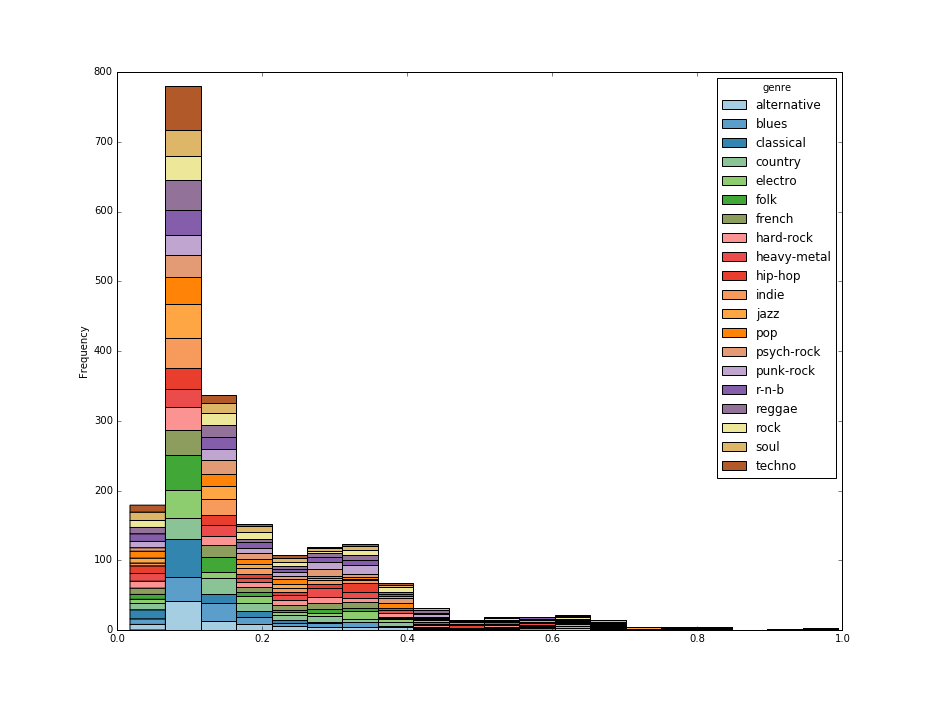

In [185]:
liveness = data[['liveness']]
liveness_genre = data.loc[:,['liveness','genre']]

liveness_by_genre = liveness_genre.pivot(columns='genre', values='liveness')
liveness_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [186]:
liveness.describe()

,liveness
count,2000.000000
mean,0.180580
std,0.142925
min,0.017900
25%,0.090975
50%,0.119000
75%,0.234000
max,0.994000


In [187]:
tmp_live_stats = data.groupby('genre')['liveness'].describe().reset_index()
live_stats = tmp_live_stats.pivot(index='genre',columns='level_1',values=None)
live_stats.columns.name = ''
live_stats

liveness                                                   \
level_1           25%     50%      75%  count    max      mean     min   
genre                                                                    
alternative  0.088750  0.1150  0.23500  100.0  0.800  0.188744  0.0299   
blues        0.094750  0.1295  0.19575  100.0  0.800  0.177746  0.0388   
classical    0.084950  0.1020  0.12750  100.0  0.745  0.133128  0.0426   
country      0.095125  0.1235  0.24225  100.0  0.668  0.172111  0.0262   
electro      0.084775  0.1310  0.27925  100.0  0.640  0.197052  0.0255   
folk         0.091275  0.1095  0.14825  100.0  0.805  0.152984  0.0337   
french       0.089325  0.1305  0.24025  100.0  0.658  0.175591  0.0283   
hard-rock    0.092275  0.1365  0.28025  100.0  0.964  0.209505  0.0283   
heavy-metal  0.097050  0.1600  0.30350  100.0  0.904  0.221422  0.0268   
hip-hop      0.099050  0.1340  0.32525  100.0  0.684  0.206125  0.0453   
indie        0.101000  0.1240  0.18900  100.0  0.800  0.178072  0.0217   
jazz         0.093775  0.1125  0.15525  100.0  0.978  0.161851  0.0416   
pop          0.089200  0.1190  0.21650  100.0  0.673  0.178835  0.0210   
psych-rock   0.100600  0.1340  0.30000  100.0  0.691  0.204051  0.0419   
punk-rock    0.096500  0.1530  0.30475  100.0  0.667  0.207918  0.0380   
r-n-b        0.094150  0.1235  0.22700  100.0  0.994  0.187715  0.0263   
reggae       0.080850  0.1150  0.21175  100.0  0.701  0.161685  0.0179   
rock         0.092200  0.1285  0.25500  100.0  0.698  0.189707  0.0210   
soul         0.088600  0.1165  0.21675  100.0  0.691  0.180982  0.0236   
techno       0.085175  0.1020  0.12025  100.0  0.616  0.126380  0.0327   

                       
level_1           std  
genre                  
alternative  0.160097  
blues        0.144802  
classical    0.108316  
country      0.119049  
electro      0.147090  
folk         0.125415  
french       0.117978  
hard-rock    0.175968  
heavy-metal  0.166943  
hip-hop      0.150253  
indie        0.141127  
jazz         0.150727  
pop          0.137502  
psych-rock   0.145750  
punk-rock    0.145247  
r-n-b        0.162912  
reggae       0.116944  
rock         0.147274  
soul         0.148464  
techno       0.087339

# Loudness attribute

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

<IPython.core.display.Javascript object>


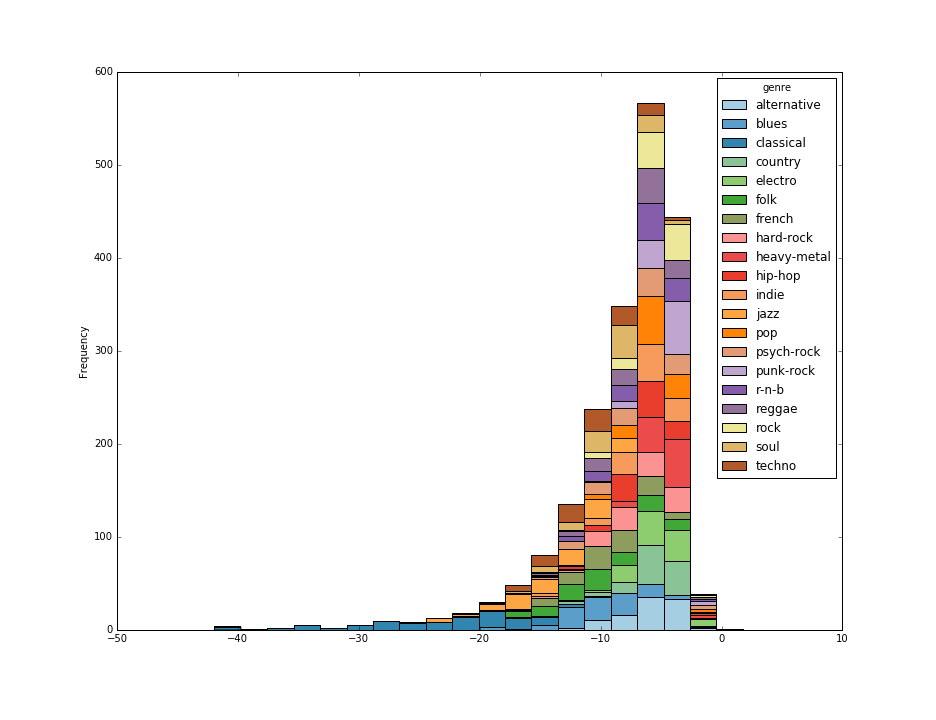

In [188]:
loudness = data[['loudness']]
loudness_genre = data.loc[:,['loudness','genre']]

loudness_by_genre = loudness_genre.pivot(columns='genre', values='loudness')
loudness_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [189]:
loudness.describe()

,loudness
count,2000.000000
mean,-8.209970
std,5.125075
min,-41.935000
25%,-10.084250
50%,-6.773000
75%,-4.836000
max,1.759000


In [190]:
tmp_loud_stats = data.groupby('genre')['loudness'].describe().reset_index()
loud_stats = tmp_loud_stats.pivot(index='genre',columns='level_1',values=None)
loud_stats.columns.name = ''
loud_stats

loudness                                                      \
level_1           25%      50%       75%  count     max      mean     min   
genre                                                                       
alternative  -7.36200  -5.5775  -4.37375  100.0  -1.606  -6.02928 -11.872   
blues       -11.88800 -10.0570  -8.18325  100.0  -1.853  -9.95801 -20.072   
classical   -26.97200 -21.3255 -18.00250  100.0 -10.391 -22.89116 -41.935   
country      -6.58500  -5.3035  -4.29450  100.0  -2.569  -5.83379 -16.942   
electro      -6.58425  -4.9825  -3.99150  100.0  -1.145  -5.30612 -13.399   
folk        -12.28275  -9.8915  -6.34125  100.0  -3.079  -9.71623 -17.394   
french      -10.99200  -9.0025  -6.76700  100.0  -4.017  -9.25004 -18.665   
hard-rock    -8.88450  -6.7565  -4.66375  100.0  -2.528  -7.12374 -15.978   
heavy-metal  -5.75225  -4.5240  -3.81450  100.0  -1.589  -4.93603 -12.103   
hip-hop      -7.78425  -6.1020  -5.03100  100.0  -2.268  -6.46910 -13.264   
indie        -7.63700  -5.9485  -4.78050  100.0   1.759  -6.48725 -20.700   
jazz        -16.68325 -12.9390 -10.54225  100.0  -6.937 -13.71568 -26.459   
pop          -6.66325  -5.5060  -4.45550  100.0  -2.244  -5.71666 -10.058   
psych-rock   -9.17950  -6.7320  -4.77875  100.0  -1.325  -7.13325 -18.118   
punk-rock    -5.51700  -4.1795  -3.63000  100.0  -1.945  -4.73793 -13.880   
r-n-b        -8.03175  -6.1360  -4.78700  100.0  -1.866  -6.63894 -14.376   
reggae       -8.65600  -6.3135  -4.88725  100.0  -0.819  -6.93858 -15.791   
rock         -6.65050  -5.1105  -4.01800  100.0  -1.665  -5.62137 -15.128   
soul        -10.32675  -8.5375  -7.02625  100.0  -2.352  -8.96679 -17.714   
techno      -12.50300 -10.7775  -8.19100  100.0  -4.272 -10.72945 -20.594   

                       
level_1           std  
genre                  
alternative  2.250037  
blues        3.343857  
classical    7.005653  
country      2.515867  
electro      2.054979  
folk         3.681568  
french       3.191430  
hard-rock    3.010171  
heavy-metal  1.621242  
hip-hop      2.192754  
indie        2.903700  
jazz         4.363756  
pop          1.697889  
psych-rock   3.183136  
punk-rock    1.853599  
r-n-b        2.511443  
reggae       2.852769  
rock         2.359776  
soul         3.027386  
techno       3.425448

# Speechiness attribute

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

<IPython.core.display.Javascript object>


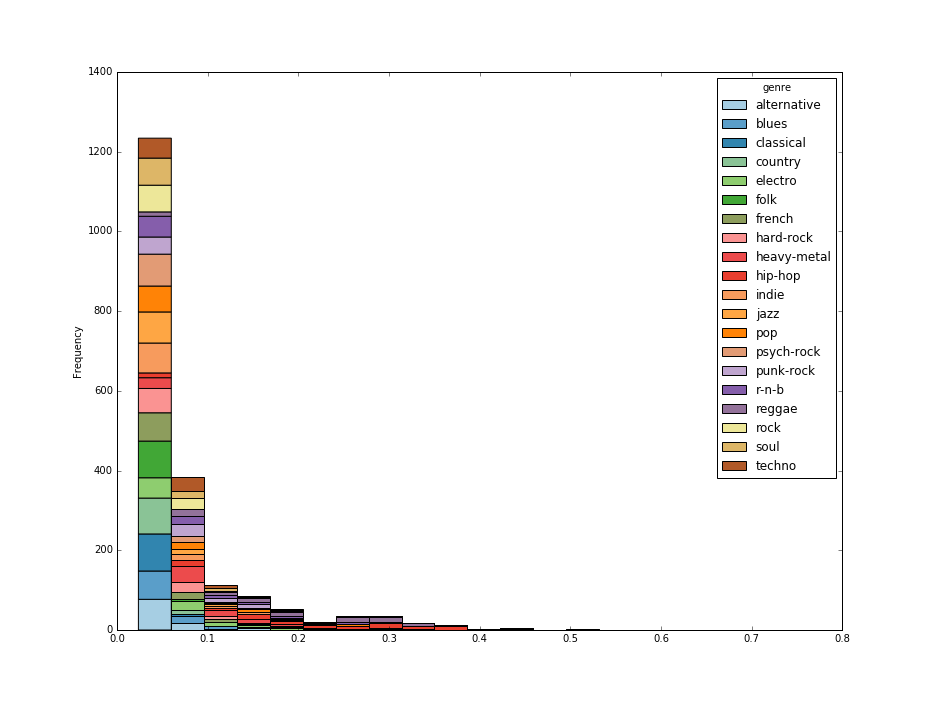

In [191]:
speechiness = data[['speechiness']]
speechiness_genre = data.loc[:,['speechiness','genre']]

speechiness_by_genre = speechiness_genre.pivot(columns='genre', values='speechiness')
speechiness_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [192]:
speechiness.describe()

,speechiness
count,2000.000000
mean,0.076345
std,0.072569
min,0.023600
25%,0.036300
50%,0.048150
75%,0.081025
max,0.749000


In [193]:
tmp_speech_stats = data.groupby('genre')['speechiness'].describe().reset_index()
speech_stats = tmp_speech_stats.pivot(index='genre',columns='level_1',values=None)
speech_stats.columns.name = ''
speech_stats

speechiness                                                     \
level_1             25%      50%       75%  count    max      mean     min   
genre                                                                        
alternative    0.034325  0.04050  0.056925  100.0  0.152  0.050426  0.0270   
blues          0.033100  0.04235  0.064350  100.0  0.276  0.054500  0.0245   
classical      0.038200  0.04235  0.047525  100.0  0.320  0.046875  0.0293   
country        0.031575  0.03885  0.048550  100.0  0.144  0.042542  0.0239   
electro        0.040700  0.05830  0.088375  100.0  0.362  0.082326  0.0274   
folk           0.030875  0.03475  0.041800  100.0  0.186  0.040372  0.0259   
french         0.032675  0.04395  0.063700  100.0  0.332  0.060096  0.0236   
hard-rock      0.033250  0.05310  0.071450  100.0  0.227  0.061440  0.0257   
heavy-metal    0.058650  0.07925  0.117250  100.0  0.349  0.092911  0.0265   
hip-hop        0.090725  0.19450  0.298500  100.0  0.749  0.205826  0.0320   
indie          0.031750  0.04280  0.060650  100.0  0.240  0.054712  0.0258   
jazz           0.034700  0.03970  0.052675  100.0  0.195  0.050567  0.0270   
pop            0.038375  0.04755  0.080325  100.0  0.385  0.074477  0.0243   
psych-rock     0.034325  0.04060  0.056300  100.0  0.178  0.050863  0.0258   
punk-rock      0.044675  0.06775  0.098475  100.0  0.260  0.078976  0.0313   
r-n-b          0.042975  0.05680  0.104500  100.0  0.320  0.087182  0.0272   
reggae         0.091500  0.18850  0.283000  100.0  0.565  0.197650  0.0302   
rock           0.034025  0.04315  0.065350  100.0  0.304  0.057232  0.0248   
soul           0.033625  0.04060  0.068400  100.0  0.504  0.064144  0.0250   
techno         0.046375  0.05990  0.079100  100.0  0.287  0.073775  0.0316   

                       
level_1           std  
genre                  
alternative  0.025707  
blues        0.036741  
classical    0.029726  
country      0.016080  
electro      0.064831  
folk         0.020891  
french       0.048407  
hard-rock    0.038333  
heavy-metal  0.055044  
hip-hop      0.126104  
indie        0.036658  
jazz         0.028676  
pop          0.066256  
psych-rock   0.028022  
punk-rock    0.044666  
r-n-b        0.067977  
reggae       0.116674  
rock         0.042700  
soul         0.067334  
techno       0.048095

# Tempo attribute

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

<IPython.core.display.Javascript object>


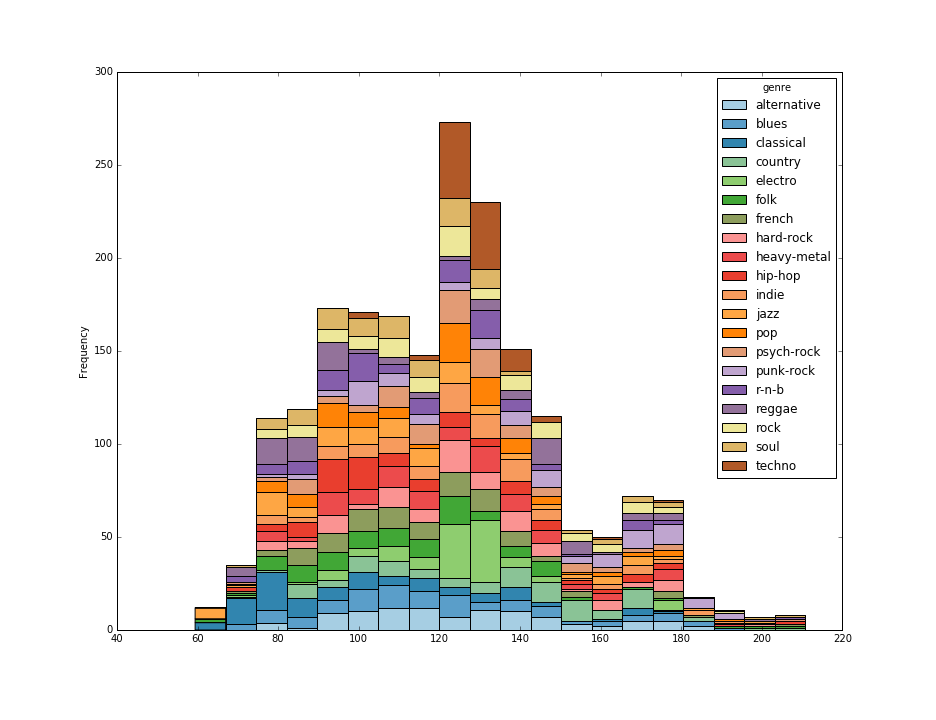

In [194]:
tempo = data[['tempo']]
tempo_genre = data.loc[:,['tempo','genre']]

tempo_by_genre = tempo_genre.pivot(columns='genre', values='tempo')
tempo_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [195]:
tempo.describe()

,tempo
count,2000.000000
mean,121.259742
std,28.371341
min,59.385000
25%,99.640500
50%,121.001500
75%,138.047750
max,210.750000


In [196]:
tmp_tempo_stats = data.groupby('genre')['tempo'].describe().reset_index()
tempo_stats = tmp_tempo_stats.pivot(index='genre',columns='level_1',values=None)
tempo_stats.columns.name = ''
tempo_stats

tempo                                                  \
level_1            25%       50%        75%  count      max       mean   
genre                                                                    
alternative  105.58100  122.5565  141.69050  100.0  186.202  125.58260   
blues         98.37675  116.5935  139.01700  100.0  189.346  120.04732   
classical     76.53700   92.6705  118.36750  100.0  177.108  100.22320   
country      108.75400  135.9515  153.95225  100.0  205.958  132.68920   
electro      119.50300  126.0545  128.05675  100.0  179.856  124.68681   
folk          94.00450  113.0865  128.69250  100.0  204.932  114.71374   
french        98.30325  115.9815  130.64825  100.0  204.141  117.33586   
hard-rock    105.95850  124.7880  141.14100  100.0  201.780  125.33860   
heavy-metal  101.94650  120.0375  138.83775  100.0  202.777  123.62409   
hip-hop       94.02625  108.0165  137.80475  100.0  209.588  116.77752   
indie        109.14450  124.9870  138.43000  100.0  194.048  126.37710   
jazz          91.32625  109.7695  128.78675  100.0  202.376  113.23654   
pop           95.86825  120.5785  130.02250  100.0  189.879  118.06210   
psych-rock   109.50775  123.6835  136.24650  100.0  206.487  123.83594   
punk-rock    110.75925  139.9890  169.01450  100.0  195.328  139.50462   
r-n-b         96.83950  116.1680  129.99800  100.0  210.750  116.38601   
reggae        84.83650  105.1405  145.38475  100.0  200.042  115.62517   
rock         104.87125  122.5175  143.94075  100.0  189.931  124.70253   
soul          96.55050  114.5095  129.37925  100.0  203.936  117.50529   
techno       124.90475  127.9410  132.59200  100.0  180.058  128.94061   

                                
level_1         min        std  
genre                           
alternative  75.009  26.406950  
blues        68.671  29.811081  
classical    62.676  28.918219  
country      72.188  29.148711  
electro      72.426  17.171654  
folk         60.527  28.409960  
french       72.682  25.868905  
hard-rock    75.766  27.200436  
heavy-metal  75.018  27.714443  
hip-hop      71.281  30.306757  
indie        74.782  26.787289  
jazz         59.385  31.142067  
pop          72.795  25.483013  
psych-rock   67.730  24.747978  
punk-rock    79.645  31.683985  
r-n-b        68.880  26.901033  
reggae       72.011  33.598640  
rock         75.766  26.986517  
soul         71.533  29.144254  
techno       98.065  10.044130

# Time Signature attribute

An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

<IPython.core.display.Javascript object>


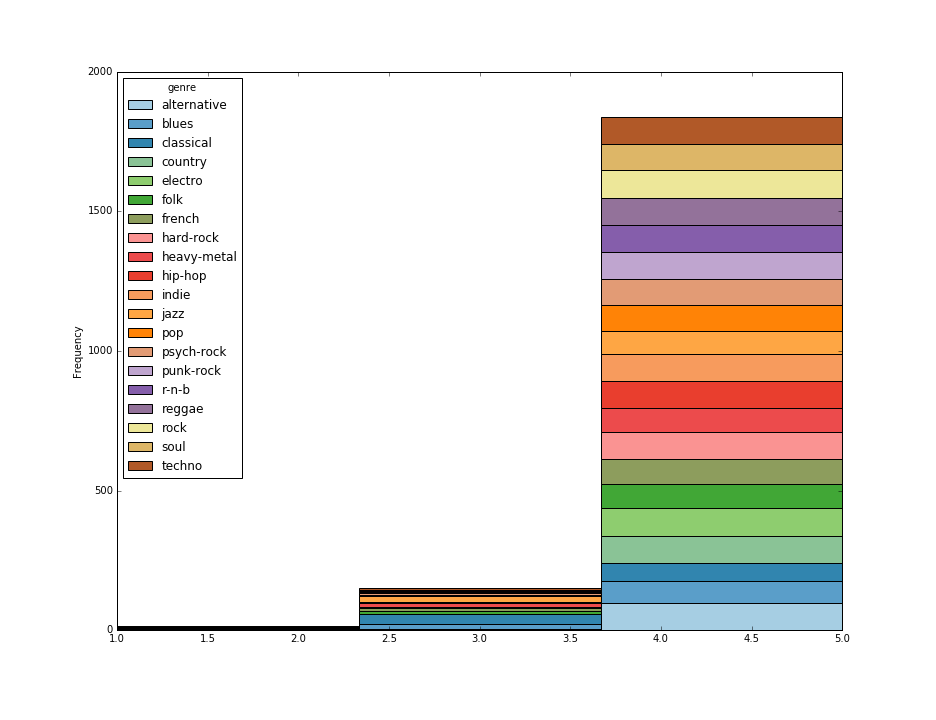

In [197]:
time_signature = data[['time_signature']]
#time_signature.plot(kind='bar',figsize=[13,8])
time_signature_genre = data.loc[:,['time_signature','genre']]

time_signature_by_genre = time_signature_genre.pivot(columns='genre', values='time_signature')
time_signature_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=3)


In [198]:
time_signature.describe(percentiles=[])

/home/henri/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,time_signature
count,1999.000000
mean,3.923962
std,0.365177
min,1.000000
50%,NaN
max,5.000000


In [199]:
tmp_ts_stats = data.groupby('genre')['time_signature'].describe(percentiles=[]).reset_index()
ts_stats = tmp_ts_stats.pivot(index='genre',columns='level_1',values=None)
ts_stats.columns.name = ''
ts_stats

/home/henri/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


time_signature                                     
level_1                50%  count  max      mean  min       std
genre                                                          
alternative            4.0  100.0  5.0  3.960000  3.0  0.242878
blues                  4.0  100.0  5.0  3.830000  3.0  0.403395
classical              NaN   99.0  5.0  3.606061  1.0  0.780086
country                4.0  100.0  4.0  3.990000  3.0  0.100000
electro                4.0  100.0  5.0  3.990000  3.0  0.173787
folk                   4.0  100.0  4.0  3.870000  1.0  0.418149
french                 4.0  100.0  5.0  3.880000  1.0  0.455716
hard-rock              4.0  100.0  5.0  3.980000  3.0  0.200000
heavy-metal            4.0  100.0  5.0  3.860000  1.0  0.471833
hip-hop                4.0  100.0  5.0  4.000000  3.0  0.201008
indie                  4.0  100.0  5.0  3.980000  3.0  0.200000
jazz                   4.0  100.0  5.0  3.860000  3.0  0.492776
pop                    4.0  100.0  4.0  3.930000  1.0  0.355477
psych-rock             4.0  100.0  4.0  3.870000  1.0  0.485237
punk-rock              4.0  100.0  4.0  3.970000  3.0  0.171447
r-n-b                  4.0  100.0  4.0  3.960000  3.0  0.196946
reggae                 4.0  100.0  5.0  4.040000  4.0  0.196946
rock                   4.0  100.0  4.0  3.970000  3.0  0.171447
soul                   4.0  100.0  5.0  3.950000  1.0  0.358870
techno                 4.0  100.0  5.0  3.980000  3.0  0.245361

# Valence attribute

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

<IPython.core.display.Javascript object>


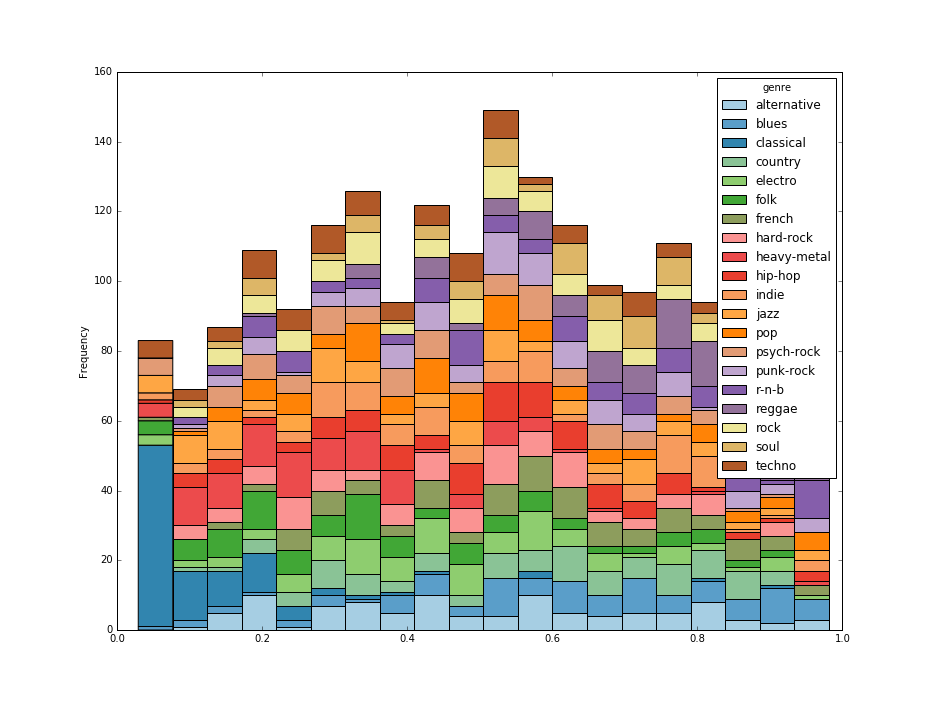

In [200]:
valence = data[['valence']]
valence_genre = data.loc[:,['valence','genre']]

valence_by_genre = valence_genre.pivot(columns='genre', values='valence')
valence_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [201]:
valence.describe()

,valence
count,2000.000000
mean,0.495031
std,0.251456
min,0.029300
25%,0.292750
50%,0.501500
75%,0.695250
max,0.981000


In [202]:
tmp_val_stats = data.groupby('genre')['valence'].describe().reset_index()
val_stats = tmp_val_stats.pivot(index='genre',columns='level_1',values=None)
val_stats.columns.name = ''
val_stats

valence                                                   \
level_1           25%     50%      75%  count    max      mean     min   
genre                                                                    
alternative  0.327500  0.4980  0.71325  100.0  0.975  0.508260  0.1130   
blues        0.497500  0.6420  0.82650  100.0  0.967  0.627580  0.0718   
classical    0.039075  0.0752  0.17000  100.0  0.894  0.128932  0.0293   
country      0.387500  0.6150  0.75625  100.0  0.930  0.575440  0.1120   
electro      0.324500  0.4605  0.58550  100.0  0.953  0.469022  0.0379   
folk         0.207500  0.3450  0.53475  100.0  0.933  0.390789  0.0337   
french       0.411750  0.5645  0.73300  100.0  0.971  0.565040  0.0550   
hard-rock    0.297000  0.4935  0.62375  100.0  0.927  0.481293  0.0993   
heavy-metal  0.171500  0.2680  0.37725  100.0  0.945  0.301459  0.0354   
hip-hop      0.349250  0.5215  0.64425  100.0  0.967  0.503816  0.0546   
indie        0.326750  0.5090  0.74250  100.0  0.976  0.515698  0.0714   
jazz         0.244500  0.4330  0.64825  100.0  0.965  0.441764  0.0324   
pop          0.332500  0.4715  0.64150  100.0  0.979  0.500480  0.1210   
psych-rock   0.281250  0.4435  0.62325  100.0  0.899  0.451391  0.0370   
punk-rock    0.401000  0.5510  0.69950  100.0  0.961  0.554040  0.1080   
r-n-b        0.398250  0.5785  0.77725  100.0  0.981  0.572550  0.1090   
reggae       0.591500  0.7460  0.83350  100.0  0.976  0.710350  0.2120   
rock         0.314500  0.5115  0.66725  100.0  0.963  0.498907  0.0847   
soul         0.501750  0.6815  0.85150  100.0  0.981  0.649094  0.0793   
techno       0.261000  0.4390  0.63825  100.0  0.972  0.454714  0.0333   

                       
level_1           std  
genre                  
alternative  0.231368  
blues        0.228331  
classical    0.149560  
country      0.217636  
electro      0.209440  
folk         0.229159  
french       0.219749  
hard-rock    0.214392  
heavy-metal  0.174645  
hip-hop      0.214164  
indie        0.232771  
jazz         0.258610  
pop          0.225190  
psych-rock   0.225388  
punk-rock    0.212469  
r-n-b        0.250980  
reggae       0.172947  
rock         0.224661  
soul         0.243242  
techno       0.249443